<a href="https://colab.research.google.com/github/Kevin-Roman/Autonomous-Car-Project/blob/master/create_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
!mkdir images
%cd /content
%ls
files.upload()
!unzip "/content/data.zip" -d "/content/images/"

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [3]:
images_dir = os.listdir('/content/images')

images = []
angles = []
for image in images_dir:
  angle = image[:-4].split("_")
  #print(angle)
  try:
    angles.append(int(angle[3]))
    images.append(os.path.join('/content/images', image))
  except:
    pass

In [4]:
df = pd.DataFrame()
print(images)
print(angles)
df['Images'] = images
df['Angles'] = angles

['/content/images/video_1_334_90.jpg', '/content/images/video_1_328_98.jpg', '/content/images/video_3_950_87.jpg', '/content/images/video_1_306_114.jpg', '/content/images/video_3_265_81.jpg', '/content/images/video_2_371_118.jpg', '/content/images/video_3_759_60.jpg', '/content/images/video_1_132_99.jpg', '/content/images/video_3_998_73.jpg', '/content/images/video_1_101_73.jpg', '/content/images/video_3_975_85.jpg', '/content/images/video_3_546_82.jpg', '/content/images/video_2_166_94.jpg', '/content/images/video_2_677_93.jpg', '/content/images/video_2_303_114.jpg', '/content/images/video_2_792_97.jpg', '/content/images/video_3_728_65.jpg', '/content/images/video_3_60_42.jpg', '/content/images/video_1_327_94.jpg', '/content/images/video_1_102_72.jpg', '/content/images/video_3_1050_69.jpg', '/content/images/video_3_925_91.jpg', '/content/images/video_3_699_68.jpg', '/content/images/video_3_1113_86.jpg', '/content/images/video_2_322_103.jpg', '/content/images/video_3_131_71.jpg', '/cont

(array([ 11.,   8.,   9.,   7.,  13.,  27.,  30.,  39.,  93., 189., 156.,
        120., 126., 152.,  73., 158., 316., 155., 246., 232.,  41.,  70.,
        136.,  35.,  23.,  17.,   5.,   4.,   4.,   2.]),
 array([ 35.        ,  38.66666667,  42.33333333,  46.        ,
         49.66666667,  53.33333333,  57.        ,  60.66666667,
         64.33333333,  68.        ,  71.66666667,  75.33333333,
         79.        ,  82.66666667,  86.33333333,  90.        ,
         93.66666667,  97.33333333, 101.        , 104.66666667,
        108.33333333, 112.        , 115.66666667, 119.33333333,
        123.        , 126.66666667, 130.33333333, 134.        ,
        137.66666667, 141.33333333, 145.        ]),
 <a list of 30 Patch objects>)

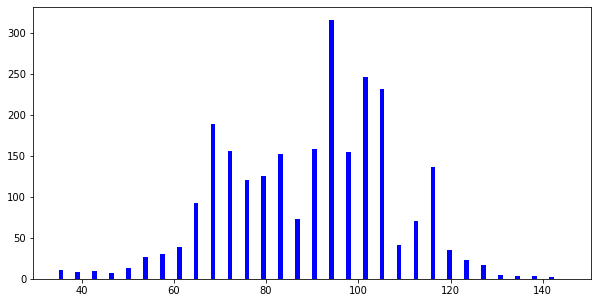

In [5]:
#hist, bins = np.histogram(df['Angles'], 10)

fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.hist(df['Angles'], bins=30, width=1, color='blue')

(array([ 3.,  1.,  0.,  3.,  2.,  2.,  8.,  2.,  1., 26., 30., 27., 21.,
        19., 26., 26., 19., 37., 61., 34., 42., 46., 12.,  6., 27.,  7.,
         6.,  3.,  1.,  2.]),
 array([ 35.        ,  38.33333333,  41.66666667,  45.        ,
         48.33333333,  51.66666667,  55.        ,  58.33333333,
         61.66666667,  65.        ,  68.33333333,  71.66666667,
         75.        ,  78.33333333,  81.66666667,  85.        ,
         88.33333333,  91.66666667,  95.        ,  98.33333333,
        101.66666667, 105.        , 108.33333333, 111.66666667,
        115.        , 118.33333333, 121.66666667, 125.        ,
        128.33333333, 131.66666667, 135.        ]),
 <a list of 30 Patch objects>)

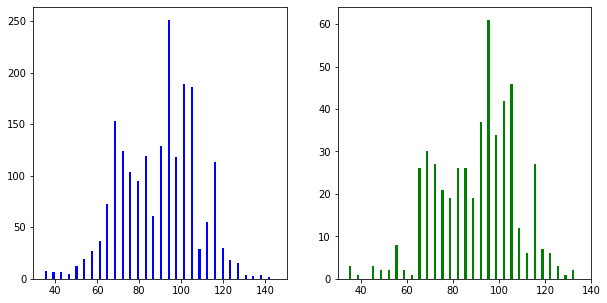

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(images, angles, test_size=0.2)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].hist(train_labels, bins=30, width=1, color='blue')
axes[1].hist(test_labels, bins=30, width=1, color='green')

In [13]:
images_processed = []
for image in images:
  image = cv2.imread(image)
  height = image.shape[0]
  image = image[int(height/2):, :, :]
  image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
  image = cv2.resize(image, (200, 66))
  images_processed.append(image)

In [14]:
# Nvidia Model - https://developer.nvidia.com/blog/deep-learning-self-driving-cars/

model = models.Sequential()
model.add(layers.Conv2D(24, (5, 5), (2, 2), activation='relu', input_shape=(66, 200, 3)))
model.add(layers.Conv2D(36, (5, 5), (2, 2), activation='relu'))
model.add(layers.Conv2D(48, (5, 5), (2, 2), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), (1, 1), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [16]:
train_images, test_images, train_labels, test_labels = train_test_split(np.array(images_processed), np.array(angles), test_size=0.2)

history = model.fit(train_images, train_labels, epochs=10, steps_per_epoch=300, validation_data=(test_images, test_labels), validation_steps=200, verbose=1, shuffle=1)


Epoch 1/10
300/300 [==============================] - 22s 72ms/step - loss: 516.3572 - accuracy: 0.0000e+00 - val_loss: 589.5850 - val_accuracy: 0.0000e+00
Epoch 2/10
300/300 [==============================] - 19s 64ms/step - loss: 231.9270 - accuracy: 0.0000e+00
Epoch 3/10
300/300 [==============================] - 19s 64ms/step - loss: 109.9675 - accuracy: 0.0000e+00
Epoch 4/10
300/300 [==============================] - 19s 63ms/step - loss: 76.4056 - accuracy: 0.0000e+00
Epoch 5/10
300/300 [==============================] - 19s 63ms/step - loss: 53.1352 - accuracy: 0.0000e+00
Epoch 6/10
300/300 [==============================] - 19s 63ms/step - loss: 53.9235 - accuracy: 0.0000e+00
Epoch 7/10
300/300 [==============================] - 19s 62ms/step - loss: 52.4936 - accuracy: 0.0000e+00
Epoch 8/10
300/300 [==============================] - 19s 63ms/step - loss: 46.3158 - accuracy: 0.0000e+00
Epoch 9/10
300/300 [==============================] - 19s 64ms/step - loss: 46.6257 - accurac

In [18]:
prediction_labels = model.predict(test_images)
print(prediction_labels[5], test_labels[5])


[115.08572] 108


In [23]:
train_images[0].shape

(66, 200, 3)

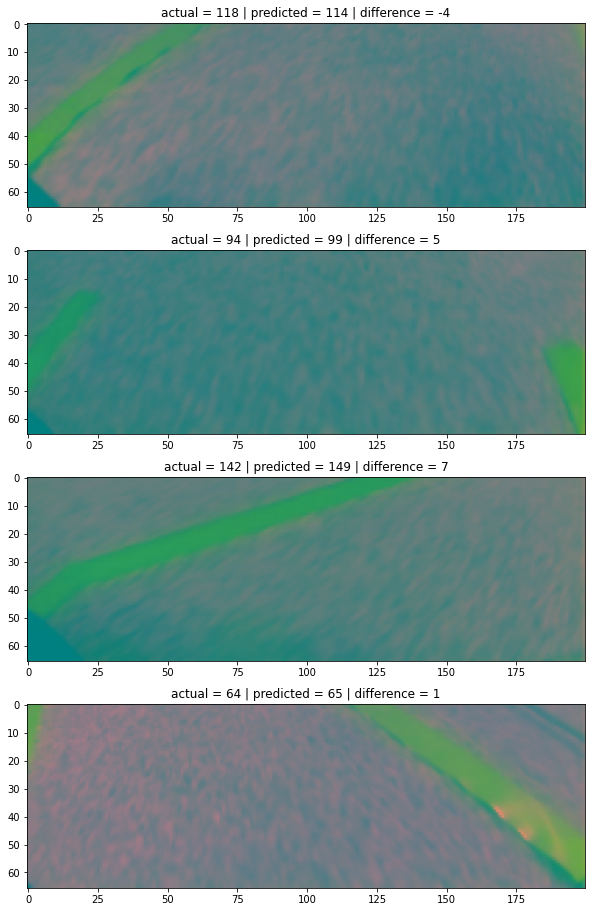

In [30]:
fig, axes = plt.subplots(4, 1, figsize=(10, 16))
for i in range(4):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"actual = {test_labels[i]} | predicted = {int(prediction_labels[i])} | difference = {int(prediction_labels[i])-test_labels[i]}")

In [22]:
model.save(os.path.join('/content/model.h5'))

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/content/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0541olb5/assets
